## 1.  Using the MNIST dataset, create a model with four dense layers. You can use any activation function.


### 1a. Tune the parameters to get at least 95% accuracy.


In [210]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [211]:
from sklearn.metrics import confusion_matrix
from numpy import linalg as la

In [212]:
mnist = tf.keras.datasets.mnist

In [213]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [214]:
X_train.shape

(60000, 28, 28)

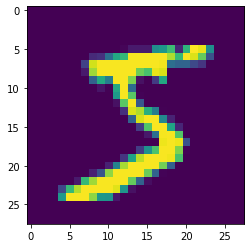

In [215]:
plt.imshow(X_train[0,:,:])

In [216]:
# Reshaping the data to make sure that we access every pixel of the image
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [217]:
X_train.shape

(60000, 784)

In [218]:
# Normalizing to get the value of every pixel in the range of 0 to 1. 
# We divide with 255 as we know that each pixel has its unique color code 
# and it's max value is 255.
X_train = X_train / 255
X_test = X_test / 255

In [223]:
X_train.shape

(60000, 784)

In [224]:
from tensorflow.keras import layers

In [225]:
model = tf.keras.models.Sequential([layers.Flatten(),
                                    layers.Dense(784,activation=tf.nn.relu, name="input_layer"),
                                    layers.Dropout(0.2),
                                    layers.Dense(526,activation=tf.nn.relu, name="hidden_layer1"),
                                    layers.Dropout(0.2),
                                    layers.Dense(350,activation=tf.nn.relu, name="hidden_layer2"),
                                    layers.Dense(10,activation=tf.nn.softmax, name="output_layer")])

In [226]:
model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [227]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6261 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2774 - accuracy: 0.9184
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2127 - accuracy: 0.9375
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1721 - accuracy: 0.9488
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1475 - accuracy: 0.9565


### 1b. Explain your process for selecting the activation functions, loss functions, and dense layer dimesionality of the output space.


#### ReLU is considered as the simple and best activation functions out there as the computation is really less. Sparsity is another important thing to be considered, so ReLU only activates a specific neuron only when that specific digit is being identified and not for other digits.

#### Crossentropy loss function is used when there are more than two classes. And as we deal with mnist which is all integers crossentropy is our best bet.

#### I had the input layer dimension as  784 because each input has 28x28 pixels that is equal to the number of features. The output layer's dimension is 10 'cause we have digits from 0-9, as we used softmax we can have one node per class otherwise it's just a single node for a classifier. The number of nodes in the hidden layer has a rule of thumb saying it should have 2/3rds the size of input layer.

### 1c. Display the confusion matrix of your final model.


In [228]:
test_predictions = model.predict(X_test)

In [229]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
confusion

array([[ 966,    0,    0,    0,    0,    4,    6,    1,    3,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   7,    1,  990,    7,    6,    1,    4,    7,    9,    0],
       [   0,    0,    6,  984,    0,    5,    0,    5,    9,    1],
       [   1,    0,    3,    0,  958,    0,    3,    2,    2,   13],
       [   5,    1,    0,   15,    2,  847,    9,    1,    8,    4],
       [   8,    3,    0,    0,    8,   10,  924,    0,    5,    0],
       [   1,    9,   17,    4,    4,    1,    0,  977,    1,   14],
       [   3,    0,    2,   10,    6,    1,    4,    4,  942,    2],
       [   4,    5,    0,   13,   16,    2,    1,    4,    9,  955]],
      dtype=int64)

## 2. Create a model to optimize prediction of the IRIS dataset using a perceptron.


In [230]:
import pandas as pd
from mpl_toolkits import mplot3d

In [231]:
class Perceptron:
    
    def __init__(self, learning_rate=0.1, n_iter=10):
        
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
        
    def fit(self, x: np.array, y: np.array):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        
        for _ in range(self.n_iter):
            
            errors = 0.0
        
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b = self._b + update
                self._w = self._w + update * xi
                errors = errors + int(update != 0.0)

            self.misclassified_samples.append(errors)
        return self
        
    def f(self, x: np.array) -> float: 
        return np.dot(x, self._w) + self._b
    
    def predict(self, x:np.array):
        p = self.f(x)
        if np.isscalar(p):
            if self.f(x) < -5:
                p = -1
            elif self.f(x) > 5:
                p = 1
            else:
                p = 0
        else:
            p[self.f(x) < -5] = -1
            p[self.f(x) > 5] = 1
            p[np.abs(p)!=1.0] = 0
        return p
    

### 2a. Load the IRIS dataset and split the data Split the data into two with 70% for training and 30% for testing.


In [232]:
from sklearn import datasets
iris=datasets.load_iris()

In [234]:
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [235]:
y_train = y_train - 1 

In [236]:
y_test = y_test - 1

### 2b. Create a Perceptron class and instantiate a new Perceptron. Fit the data to the model for 10 training iterations. Compute the prediction.


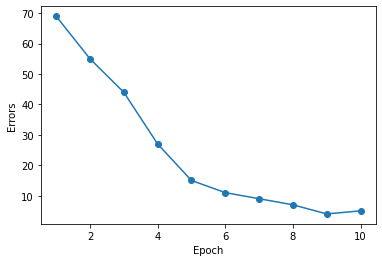

In [237]:
# train the model
learning_rate=0.01 
n_iter=10
classifier = Perceptron(learning_rate=learning_rate, n_iter=n_iter)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [238]:
from sklearn.metrics import accuracy_score
classifier = Perceptron()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Iterations %d: accuracy %f" %(n_iter,accuracy))

Iterations 10: accuracy 0.555556


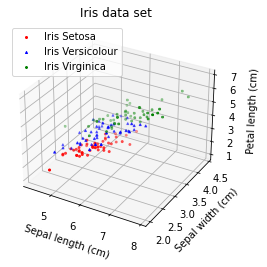

In [239]:
fit = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()

### 2c. Plot the prediction for 100 epochs.


In [240]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)
y_test = y_test - 1
y_train = y_train - 1
learning_rate=0.01 
# n_iter = np.array([1,10,100,200])
n_iter = np.arange(1, 101)
accuracy = []
for i in n_iter:
    classifier = Perceptron(learning_rate=learning_rate, n_iter=i)
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    accuracy.append(accuracy_score(predictions,y_test))

Text(0, 0.5, 'Accuracy')

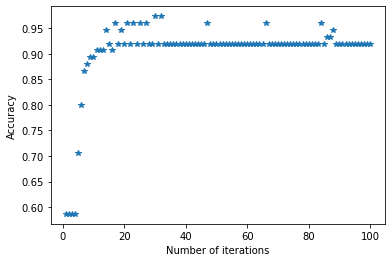

In [241]:
plt.plot(n_iter, accuracy, '*')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')

## 3. Generate three clusters with 500 points each with a standard normal distribution but with the following variance (σ) and means (µ):

σ1 = (1.2,0.8) µ1 = (-2,-2)\
σ2 = (0.4, 1.3) µ2 = (1,-1)\
σ3 = (0.8, 0.9) µ3 = (6,12)


In [242]:
x11 = np.random.standard_normal((500,1))*1.2+np.ones((500,1))-2
x12 = np.random.standard_normal((500,1))*0.8+np.ones((500,1))-2
x1= np.concatenate((x11,x12),axis=1)

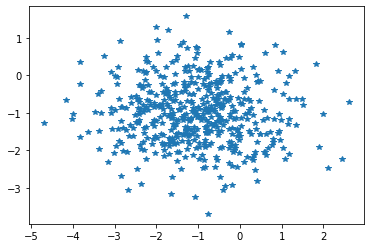

In [243]:
plt.plot(x1[:,0], x1[:,1], '*')

In [244]:
x21 = np.random.standard_normal((500,1))*0.4+np.ones((500,1))+1
x22 = np.random.standard_normal((500,1))*1.3+np.ones((500,1))-1
x2= np.concatenate((x21,x22),axis=1)

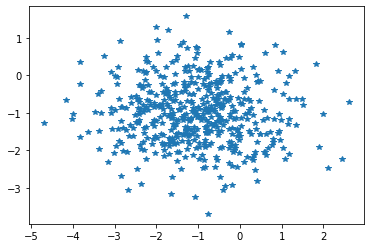

In [245]:
plt.plot(x1[:,0], x1[:,1], '*')

In [246]:
x31 = np.random.standard_normal((500,1))*0.8+np.ones((500,1))+6
x32 = np.random.standard_normal((500,1))*0.9+np.ones((500,1))+12
x3= np.concatenate((x31,x32),axis=1)

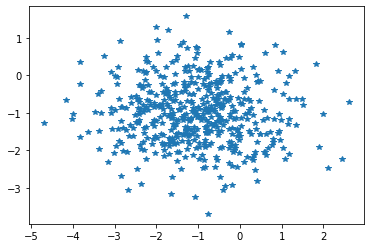

In [247]:
plt.plot(x1[:,0], x1[:,1], '*')

### 3a. Plot the three clusters with different colors for each to show the truth data.


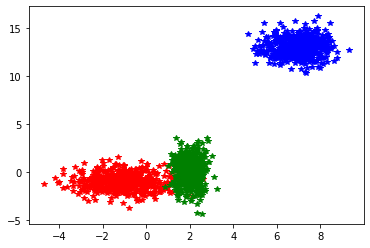

In [248]:
X = np.concatenate((x1,x2,x3),axis=0)
plt.plot(X[0:500,0],X[0:500,1],'r*')
plt.plot(X[500:1000,0], X[500:1000,1],'g*')
plt.plot(X[1000:1500,0],X[1000:1500,1],'b*')

### 3b. Select three cluster centers and plot the selection along with the dataset.


In [249]:
import scipy
from scipy.spatial.distance import cdist
x = X
k = 3
idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]

In [250]:
k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')

In [251]:
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

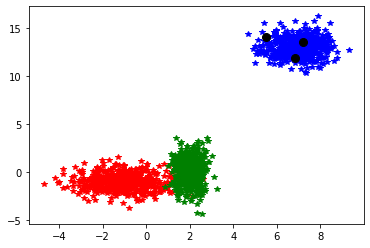

In [252]:
plt.plot(X[0:500,0],X[0:500,1],'r*')
plt.plot(X[500:1000,0], X[500:1000,1],'g*')
plt.plot(X[1000:1500,0],X[1000:1500,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

### 3c. Use the k-Means clustering algorithm to classify the datapoints to a cluster. Plot each iteration and exit the process when it reaches a prior estimation error of less than 0.01.


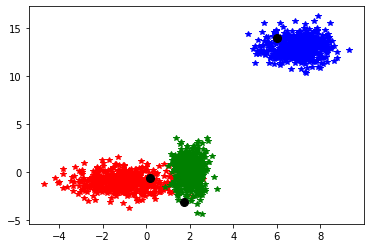

In [253]:
no_of_iterations = 5
idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
old_cent = centroids
plt.plot(X[0:500,0],X[0:500,1],'r*')
plt.plot(X[500:1000,0], X[500:1000,1],'g*')
plt.plot(X[1000:1500,0],X[1000:1500,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

Prior estimation error:  -9.215137851939733
Iteration Number:  1


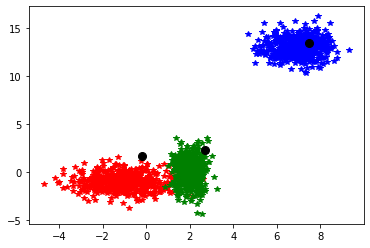

Prior estimation error:  7.135914790878738
Iteration Number:  2


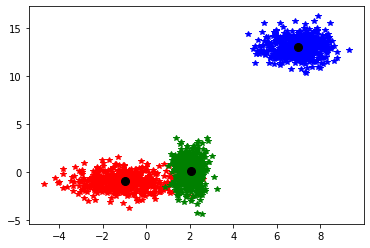

Prior estimation error:  0.5201780117171698
Iteration Number:  3


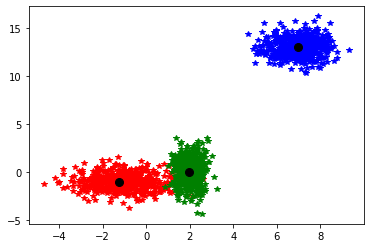

Prior estimation error:  0.1259099966031384
Iteration Number:  4


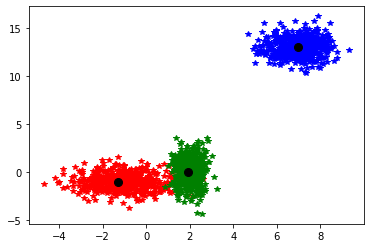

Prior estimation error:  0.008059064662677671
Required prior estimation error reached.


In [254]:
for i in range(no_of_iterations):
    
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
        
    centroids = np.vstack(centroids)
    prior_estimation_error = np.sum(old_cent - centroids)
    print("Prior estimation error: ",prior_estimation_error)
    if np.abs(prior_estimation_error) < 0.01:
        print("Required prior estimation error reached.")
        break
        
    print("Iteration Number: ", i+1)
    
    old_cent = centroids
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    plt.plot(X[0:500,0],X[0:500,1],'r*')
    plt.plot(X[500:1000,0], X[500:1000,1],'g*')
    plt.plot(X[1000:1500,0],X[1000:1500,1],'b*')
    plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

### 3d. Repeat the process, but use 4 clusters instead of 3.


In [255]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

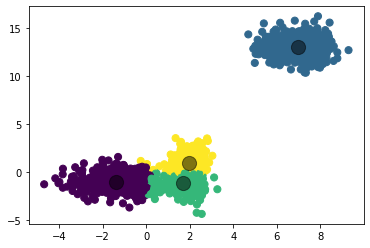

In [256]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

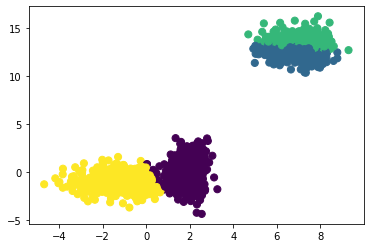

In [257]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

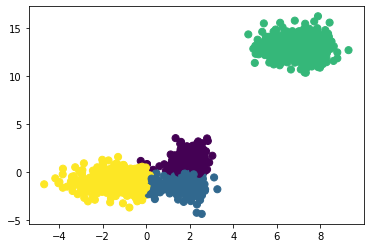

In [258]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [261]:
no_of_iterations = 10
for i in range(no_of_iterations):
    
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
        
    centroids = np.vstack(centroids)
    prior_estimation_error = np.sum(old_cent - centroids)
    print("Prior estimation error: ",prior_estimation_error)
    if np.abs(prior_estimation_error) < 0.01:
        print("Required prior estimation error reached.")
        break
        
    print("Iteration Number: ", i+1)
    
    old_cent = centroids
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    plt.plot(X[0:375,0],X[0:375,1],'r*')
    plt.plot(X[375:750,0], X[375:750,1],'g*')
    plt.plot(X[750:1125,0],X[750:1125,1],'b*')
    plt.plot(X[1125:1500,0],X[1125:1500,1],'y*')
    plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

Prior estimation error:  0.008059064662677671
Required prior estimation error reached.


## 4. Load the breast cancer dataset from Scikit-Learn.


In [262]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


### 4a. Split the data into 50% training and 50% testing.


In [263]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.5,random_state=10) 

### 4b. Create a SVM classifier and train the model.


In [264]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear') # Linear Kernel
clf_svm.fit(X_train, y_train) # Training the model

SVC(kernel='linear')

### 4c. Predict the output using the testing data.


In [265]:
y_pred = clf_svm.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

### 4d. What is the accuracy, precision, and recall scores?


In [266]:
from sklearn import metrics
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred), 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred), 2))

Accuracy: 0.95
Precision: 0.98
Recall: 0.95
